In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 0. Basic Python

In [2]:
# for loops
my_list = ["one", "two", "three"]
print(my_list)

['one', 'two', 'three']


In [3]:
for thing in my_list:
    print("hello")
    print(thing)

hello
one
hello
two
hello
three


In [5]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
my_array = np.zeros(10)

for index in range(10):
    my_array[index] = index ** 2

In [7]:
my_array

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

# 1. Numpy

In [8]:
my_array[3] # single index

9.0

In [9]:
my_array[-3:] # last 3 elements

array([49., 64., 81.])

In [10]:
my_array[2:5] # range of elements

array([ 4.,  9., 16.])

In [11]:
my_array < 30 # a binary array

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False])

In [12]:
my_array[my_array < 30] # binary indexing

array([ 0.,  1.,  4.,  9., 16., 25.])

In [13]:
my_array[[0, 1, 3]]

array([0., 1., 9.])

In [14]:
my_array.max() # array aggregation

81.0

# 2. Matplotlib

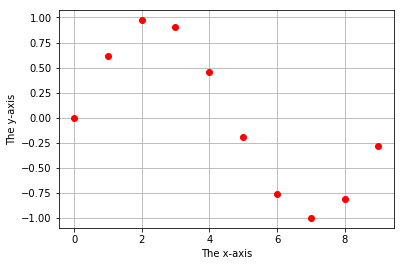

In [19]:
plt.plot(range(10), np.sin(np.linspace(0, 6, 10)), 'ro')
plt.xlabel("The x-axis")
plt.ylabel("The y-axis")
plt.grid()

# 3. Statistics

In [20]:
from scipy import stats

In [21]:
stats.binom_test?

In [22]:
my_data = np.random.randn(100)

nbootstraps = 1000

bsmeans = np.zeros(nbootstraps)

for ii in range(nbootstraps):
    bootstrap_indices = np.random.randint(0, 100, 100)
    bootstrap_data = my_data[bootstrap_indices]
    bsmeans[ii] = bootstrap_data.mean()

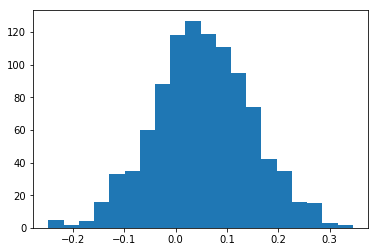

In [24]:
plt.hist(bsmeans, 20);

In [ ]:
stats.ttest_ind # test difference of two groups
stats.ttest_rel # paired test of difference of two groups

In [25]:
var1 = np.random.randn(10)
var2 = np.random.randn(10)

np.corrcoef(var1, var2)

array([[ 1.        , -0.05007913],
       [-0.05007913,  1.        ]])

# 4. Timeseries

In [26]:
from scipy import signal

In [ ]:
np.convolve # convolution
signal.firwin # create a low-pass filter
plt.psd # compute power spectral density
plt.specgram # compute the spectrogram

# 5. Linear regression

In [27]:
X = np.random.randn(100, 5)
true_wt = np.random.randn(5)
y = X.dot(true_wt) + np.random.randn(100)

In [29]:
est_wt, res, rank, sing = np.linalg.lstsq(X, y)

/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [31]:
print(est_wt)
print(true_wt)

[ 0.42256952  0.76605399 -0.69294855 -1.6603249   0.49453111]
[ 0.3574857   0.73960497 -0.87036996 -1.54475001  0.62764996]


In [34]:
# predict y given X and the estimated weights est_wt
X.dot(est_wt);

In [32]:
# in-set R^2
# R2 = 1 - RSS / TSS
R2 = 1 - ((y - X.dot(est_wt))**2).sum() / (y**2).sum()
print(R2)

0.8429364368802132
